## Forecasting Model

### Outline:</li>

<li>1) Objectives </li>
<li>2) Cleaning data</li>
<li>3) visualizing data</li> 
<li>4) Implement models</li>
<li>5) findings </li>
<li>6) Conclusion</li>

## 1) Objectives:
#### Developing a 'predictive analytics platform'.

#### Questions need answers: 

1) What are the Future trends in:

   * Customer data (frequency, spend)
   * Performance data (daily, monthly)
   * Closed periods (no revenue)

2) Apply range of scenarios to the model, that can flex and incorporate potential shop closures and factor in past data trends. 
   * How COVID-19 closures  have impacted revenues so that we can understand how trends impact those months and potentially  adjust out staffing model

3) Consider programming/coding the model into a platform (of your choice) to give the model a user-friendly interface


## 2)Cleaning data: 
 imporing data 

In [1]:
# Importing libraries:
import pandas as pd 
import numpy as np 
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

### The cleaning start -- Lets goooo
* 1) Clearing unnecessary columns
* 2) Checking for missing values 

In [3]:
# Clearing unnecessary columns
# We should know type and name of columns and clear unwanted data
column_names=file.columns
print(column_names)
file.dtypes

Index(['#', 'Date', 'Time', 'Category', 'Service', 'Customer', 'Staffer',
       'Service length', 'Service price', 'Net price', 'Tax', 'Gross price'],
      dtype='object')


#                         object
Date              datetime64[ns]
Time                      object
Category                  object
Service                   object
Customer                  object
Staffer                   object
Service length            object
Service price            float64
Net price                float64
Tax                      float64
Gross price              float64
dtype: object

In [4]:

# Create list comprehension of the columns you want to lose
columns_to_drop = [column_names[i] for i in [0, 7,8,9,10]]
# Drop unwanted columns
file.drop(columns_to_drop, inplace=True, axis=1)

In [6]:
file.shape

(2422, 7)

In [7]:
# Now, check for missing values
print('Columns that have missing values'.center(64, '='))
column_missing = file.isna().any(axis=0)
print(column_missing)

================Columns that have missing values================
Date           True
Time           True
Category       True
Service        True
Customer       True
Staffer        True
Gross price    True
dtype: bool


In [8]:
print('Rows that have missing values'.center(64, '='))
row_missing = file.isna().any(axis=0)
print(row_missing)

=================Rows that have missing values==================
Date           True
Time           True
Category       True
Service        True
Customer       True
Staffer        True
Gross price    True
dtype: bool


In [9]:
file['Category'] = file['Category'].fillna('No Category')
file['Service'] = file['Service'].fillna('No Service')
file['Customer'] = file['Customer'].fillna('No Customer')
file['Time']= file['Time'].fillna(0)
file['Staffer'] = file['Staffer'].fillna('No Staffer')
file['Staffer'] = file['Staffer'].fillna('No Staffer')
file['Gross price'] = file['Gross price'].fillna(0)


In [11]:
file.isnull().sum()

Date           5
Time           0
Category       0
Service        0
Customer       0
Staffer        0
Gross price    0
dtype: int64

In [15]:
file.shape

(2416, 7)

In [16]:
# Cleaning the dataset form duplicated values.
duplicate_rows = file[file.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (2, 7)


In [17]:
file=file.drop_duplicates()

In [18]:
file.shape

(2414, 7)

##  Data Predications

In [28]:
file.drop(["Time","Category","Service","Customer","Staffer"], axis=1, inplace=True)

In [29]:
# reassign Date as an index for further use
#indexing.head(5)


In [30]:
indexing= file.set_index(['Date']) 

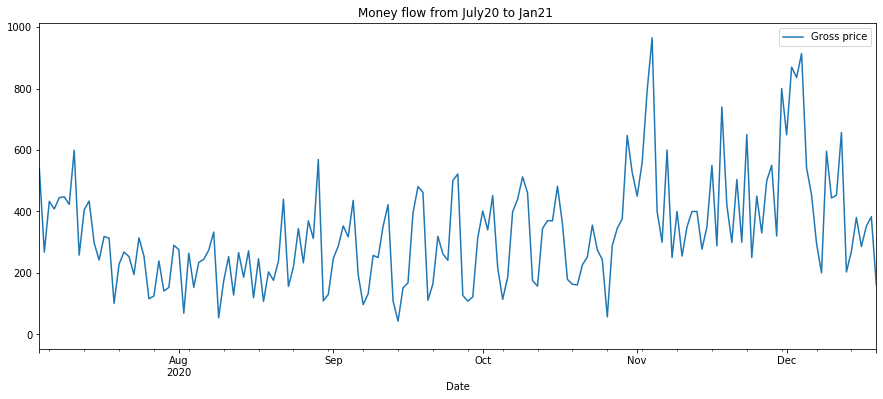

In [31]:
new=file.groupby(pd.Grouper(key="Date")).sum()
new.plot(figsize=(15,6))
plt.plot(indexing)
plt.title('Money flow from July20 to Jan21 ')
plt.show()

In [32]:
#rolling static
rolmean= new.rolling(window=7).mean()
rolstd= new.rolling(window=7).std()
#print(rolmean,rolstd)

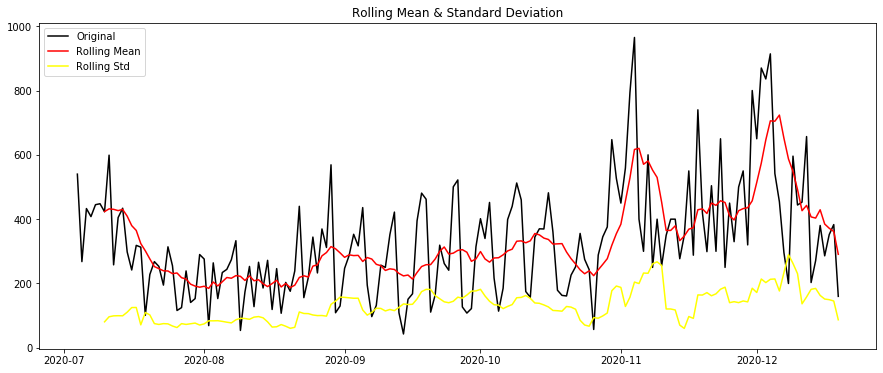

In [33]:

plt.figure(figsize=(15, 6))
orig= plt.plot(new, color='black',label='Original')
mean= plt.plot(rolmean, color='red',label='Rolling Mean')
std= plt.plot(rolstd, color='yellow',label='Rolling Std')
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")
plt.show(block=False)


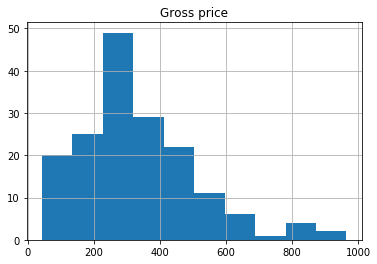

In [34]:
new.hist()
pyplot.show()

In [35]:
#df['coloum'] = df['coloum'].replace(['value_1','valu_2'],'new_value')
new2= new.replace(0,1)
#new

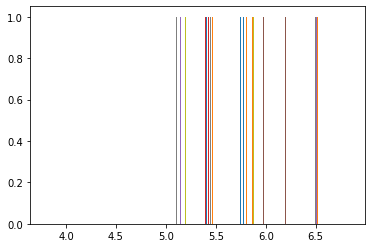

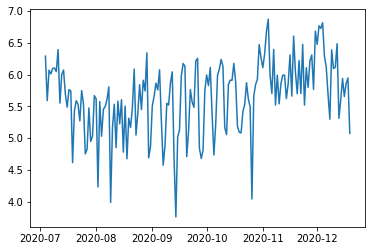

In [36]:
from matplotlib import pyplot
from numpy import log
new2=log(new2)
pyplot.hist(new2)
pyplot.show()
pyplot.plot(new2)
pyplot.show()


In [37]:

#Perform Dickey-Fuller test:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(new2, autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value', '#Lags Used','#Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistics                  -1.580591
p-value                           0.493336
#Lags Used                       13.000000
#Number of observations used    155.000000
Critical Value (1%)              -3.473259
Critical Value (5%)              -2.880374
Critical Value (10%)             -2.576812
dtype: float64


In [38]:
result = adfuller(new)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.851940
p-value: 0.354996
Critical Values:
	1%: -3.474
	5%: -2.880
	10%: -2.577


In [39]:
# ADF statistic is larger than critical values.
#Since P value is high >0.05 fail to reject the hypothesis that the data is stationary 
# We have a non stationary means mean and std varies over time and no seasonality.

In [40]:
# working out to get it stationary 
#1) removing trends

In [41]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'


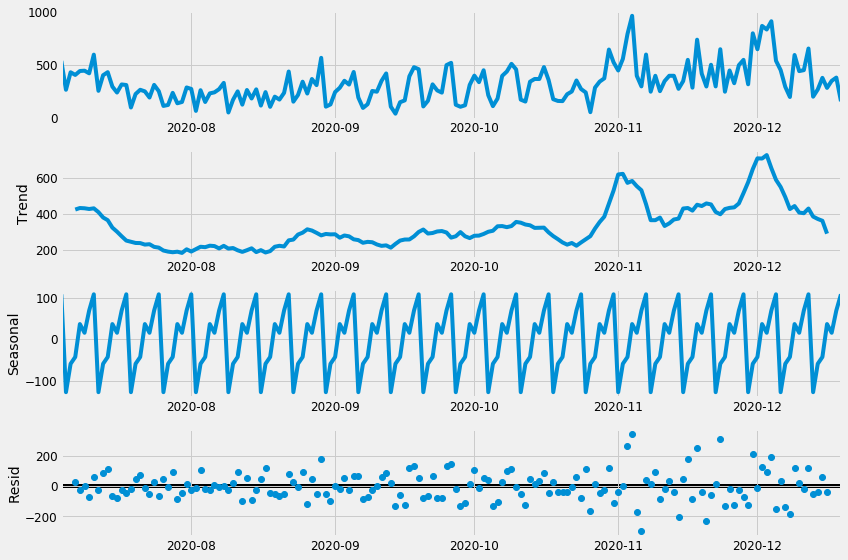

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(new, model='additive')
fig = decomposition.plot()
plt.show()

In [43]:
#first_diff = new2.diff()[1:]

In [44]:
'''
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Generated profit', fontsize=20)
plt.ylabel(new2, fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-07-04'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2) 
'''

"\nplt.figure(figsize=(10,4))\nplt.plot(first_diff)\nplt.title('Generated profit', fontsize=20)\nplt.ylabel(new2, fontsize=16)\nfor year in range(start_date.year,end_date.year):\n    plt.axvline(pd.to_datetime(str(year)+'-07-04'), color='k', linestyle='--', alpha=0.2)\nplt.axhline(0, color='k', linestyle='--', alpha=0.2) \n"

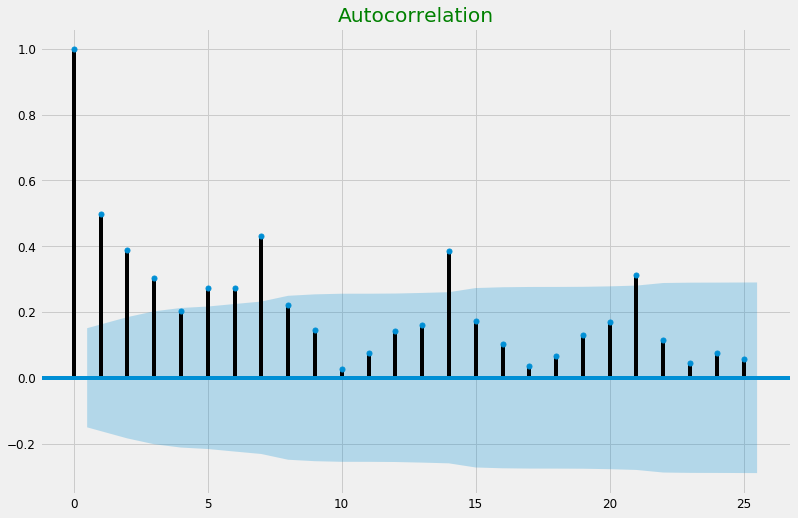

In [45]:

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(new, lags=25)
pyplot.show()


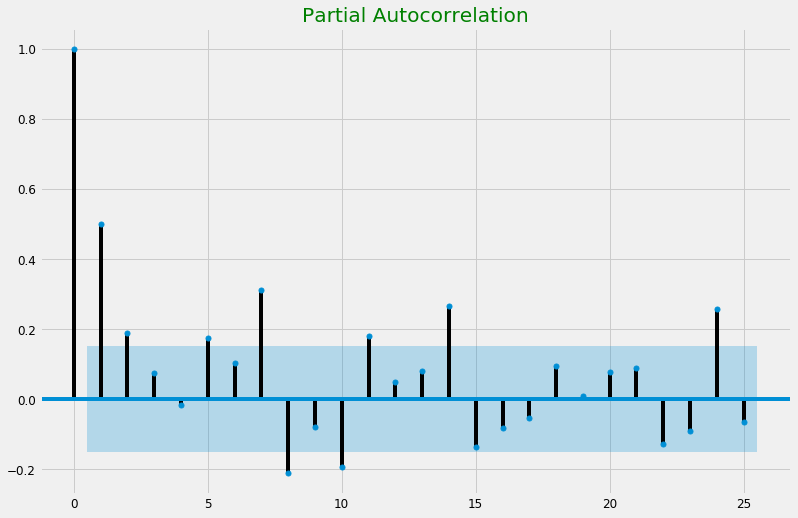

In [46]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(new, lags=25)
pyplot.show()


In [47]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
'''
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
'''

"\nprint('Examples of parameter for SARIMA...')\nprint('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))\nprint('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))\nprint('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))\nprint('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))\n"

In [48]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(new,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2469.55901940905
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2215.064677914205
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2142.6332462128025
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1920.6646414319487
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2142.03069890861
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2072.117612839468
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1954.2980209497923
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1921.489074968284
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2332.1997924237558
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2120.765378959801
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2096.895024455571
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1881.5396365413285
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2101.198186978552
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2038.5552396369726
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1927.3367401338428
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1883.3721774968662
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2199.038476738894
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2046.7081736502605
ARI

In [49]:
#ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1862.3250272457499
mod = sm.tsa.statespace.SARIMAX(new,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3852      0.082      4.724      0.000       0.225       0.545
ma.L1         -0.9697      0.037    -26.548      0.000      -1.041      -0.898
ar.S.L12      -0.1022      0.120     -0.852      0.394      -0.337       0.133
ma.S.L12      -0.8114      0.130     -6.251      0.000      -1.066      -0.557
sigma2      2.509e+04   3229.450      7.769      0.000    1.88e+04    3.14e+04


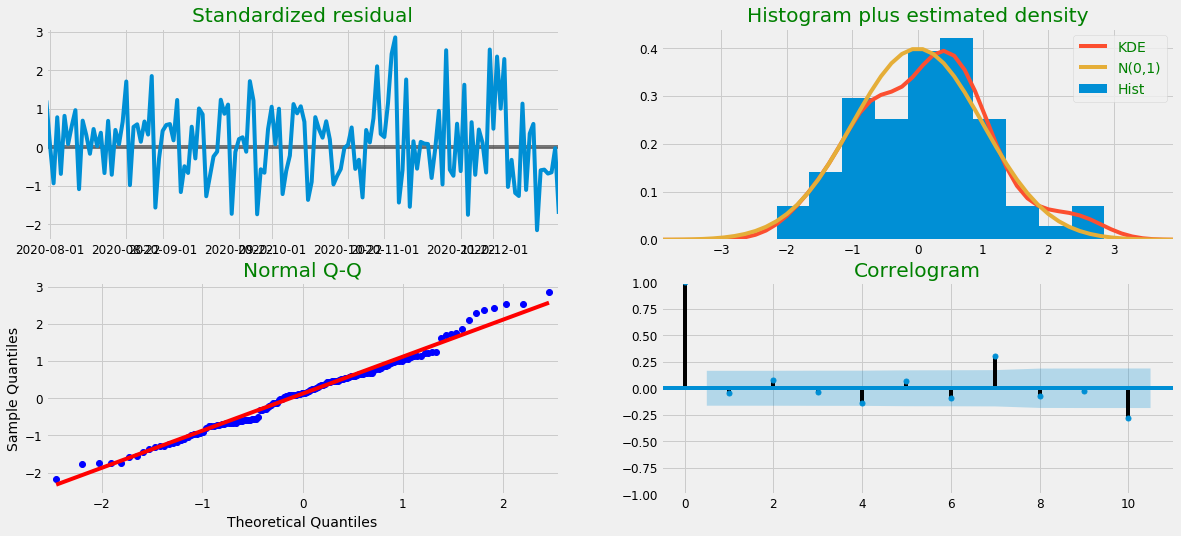

In [50]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

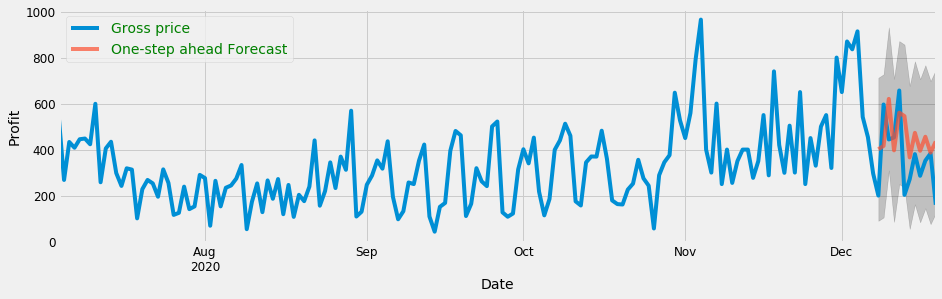

In [51]:
pred = results.get_prediction(start=pd.to_datetime('2020-12-8'), dynamic=False)
pred_ci = pred.conf_int()
ax = new['2020-7-4':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Profit')
plt.legend()
plt.show()

In [52]:
#y_forecasted = pred.predicted_mean
#y_truth = new['2020-12-8':]
#mse = ((y_forecasted - y_truth) ** 2).mean()
#print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
from sklearn.metrics import mean_squared_error
y_truth = pred.predicted_mean
y_forecasted = new['2020-12-8':]
mse=mean_squared_error(y_truth , y_forecasted)
mse

29132.398138083558

In [53]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 170.68


### It means within range of 950 and 0 the model succed to predict within 170.68 from reality. 

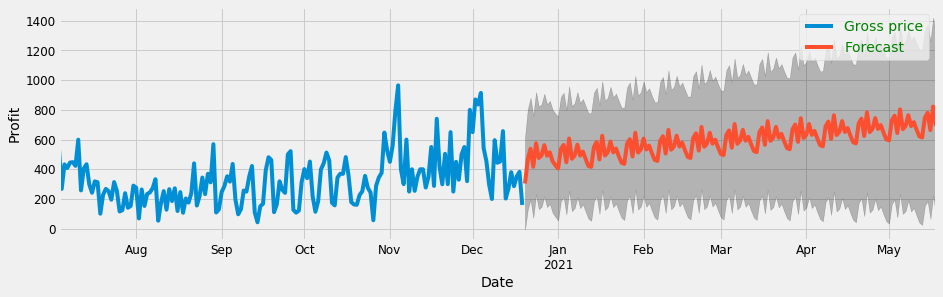

In [54]:
pred_uc = results.get_forecast(steps=150)
pred_ci = pred_uc.conf_int()
ax = new.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Profit')
plt.legend()
plt.show()